##Instalando Biblioteca externa do Collab necessária.

In [1]:
!pip install scikeras

In [2]:
import pandas as pd
import keras
import tensorflow
import tensorflow_hub as hub
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

##Importando Dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/data.csv')

##Normalizando Dataset

In [4]:
dataset['clean_Sentence'] = dataset['Sentence'].str.lower()
dataset.loc[:,'clean_Sentence'] = dataset.loc[:,'clean_Sentence'].str.replace('[^\w\s]', '')
dataset.loc[:,'clean_Sentence'] = dataset.loc[:,'clean_Sentence'].str.replace('[0123456789]', '')
nltk.download('stopwords')
stop = stopwords.words('english')
dataset['clean_Sentence'] = dataset['clean_Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataset

<ipython-input-4-48ec25ecb181>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset.loc[:,'clean_Sentence'] = dataset.loc[:,'clean_Sentence'].str.replace('[^\w\s]', '')
<ipython-input-4-48ec25ecb181>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset.loc[:,'clean_Sentence'] = dataset.loc[:,'clean_Sentence'].str.replace('[0123456789]', '')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentence,Sentiment,clean_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi lows bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sales doubled eurm...
3,According to the Finnish-Russian Chamber of Co...,neutral,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining percent sta...
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rising costs forced packaging producer huhtama...
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking first used summer training meth...
5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line eu deci...
5840,"In the building and home improvement trade , s...",neutral,building home improvement trade sales decrease...


##Dummyficando a coluna "Sentiment"

In [5]:
Y = dataset.loc[:,"Sentiment"]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = keras.utils.to_categorical(encoded_Y)

In [6]:
dummy_y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

##Separando conjunto treino e teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset['clean_Sentence'], dummy_y, test_size=0.1, random_state=42)

##Vetorizando as entradas

In [8]:
cv = CountVectorizer()
#sentences = dataset.loc[:, "clean_Sentence"]

In [9]:
cv.fit(dataset['clean_Sentence'])

CountVectorizer()

In [10]:
X_train_vectorized = cv.transform(X_train)
X_test_vectorized = cv.transform(X_test)

In [11]:
x_train = X_train_vectorized.toarray()
x_test = X_test_vectorized.toarray()

##Construção do modelo

In [43]:
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Dense(4, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(tensorflow.keras.layers.Dropout(0.4))
model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

##Rodando modelo

In [44]:
history = model.fit(x_train,y_train,epochs = 25, batch_size = 32, validation_split=0.1, shuffle = True, verbose = 1)

Epoch 1/25
148/148 [==============================] - 1s 4ms/step - loss: 1.1519 - accuracy: 0.3314 - val_loss: 1.0287 - val_accuracy: 0.4867
Epoch 2/25
148/148 [==============================] - 1s 3ms/step - loss: 1.0236 - accuracy: 0.4521 - val_loss: 1.0021 - val_accuracy: 0.4734
Epoch 3/25
148/148 [==============================] - 1s 3ms/step - loss: 0.9808 - accuracy: 0.5122 - val_loss: 0.9940 - val_accuracy: 0.4734
Epoch 4/25
148/148 [==============================] - 1s 3ms/step - loss: 0.9592 - accuracy: 0.5519 - val_loss: 0.9860 - val_accuracy: 0.4734
Epoch 5/25
148/148 [==============================] - 0s 3ms/step - loss: 0.9298 - accuracy: 0.5781 - val_loss: 0.9768 - val_accuracy: 0.4734
Epoch 6/25
148/148 [==============================] - 0s 3ms/step - loss: 0.9169 - accuracy: 0.5834 - val_loss: 0.9657 - val_accuracy: 0.4753
Epoch 7/25
148/148 [==============================] - 1s 3ms/step - loss: 0.8976 - accuracy: 0.6018 - val_loss: 0.9525 - val_accuracy: 0.4848
Epoch 

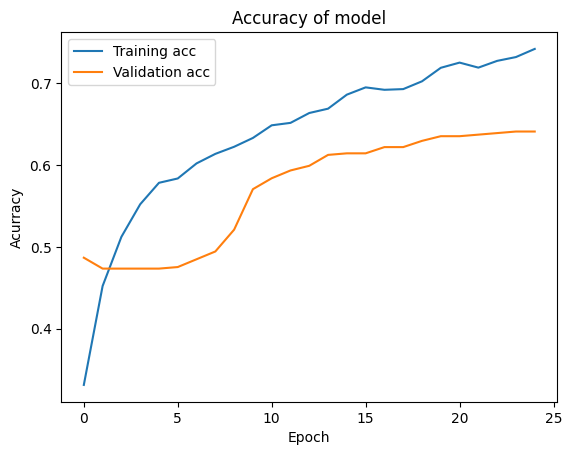

In [45]:
#Mostrando gráfico da acurácia conforme o modelo é treinado
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title('Accuracy of model')
plt.xlabel('Epoch')
plt.ylabel('Acurracy')
plt.legend()
plt.show()

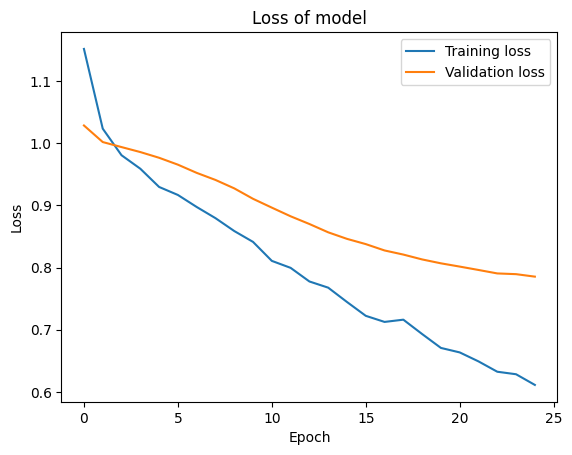

In [46]:
#Mostrando gráfico do loss conforme o modelo é treinado
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss of model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Previsão feita pelo modelo

In [16]:
y_pred = model.predict(x_test)

19/19 [==============================] - 0s 2ms/step


##Conjunto de funções auxiliares para tratar os dados previstos

In [17]:
def allzeros(values): #Função que verifica se todos os valores no array previstos estão setados como zero
  count = 0
  for i in values:
    if i != 0:
      return False
  return True
def manyOnes(values): #Função que verifica se mais de um dos valores previsto estão setados como um
  count = 0
  for i in values:
    if i == 1:
      count+=1
  if count > 1:
    return True
  else:
    return False
def maxValueIndex(values): #Função que pega o índice do campo com maior probabilidade de ser
  max = np.inf * -1
  for i in range(len(values)):
    if values[i] > max:
      max = values[i]
      index = i
  return index
def arredondarValores(y_test): #Função que arredonda os valores previsto para 0 ou 1
  result = y_test.copy()
  for i in range(len(y_test)):
    for j in range(len(y_test[i])):
      if y_test[i][j] >= 0.5:
        result[i][j] = 1
      else:
        result[i][j] = 0
    if allzeros(result[i]):
      index = maxValueIndex(y_test[i])
      result[i][index] = 1
    elif manyOnes(result[i]):
      index = maxValueIndex(y_test[i])
      result[i] = [0.0, 0.0, 0.0]
      result[i][index] = 1
  return result

def decide(values): #Função para printar qual classificação corresponde ao dummy
  for i in range(len(values)):
    if values[i] == 1:
      if i == 0:
        return 'Negativo'
      elif i == 1:
        return 'Neutro'
      else:
        return 'Positivo'
  return 'Erro Inesperado ocorreu!'

##Resultado

In [18]:
y_pred_arredondado = arredondarValores(y_pred)
y_pred_arredondado

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [19]:
accuracy = round(accuracy_score(y_test, y_pred_arredondado), 3)
precision = round(precision_score(y_test, y_pred_arredondado, average='micro'), 3)
recall = round(recall_score(y_test, y_pred_arredondado, average='micro'), 3)
print(accuracy)
print(precision)
print(recall)

0.641
0.641
0.641


#Realizar previsão individual

In [22]:
teste = cv.transform(["not"])
a = model.predict(teste.toarray())
decide(arredondarValores(a)[0])

1/1 [==============================] - 0s 68ms/step


'Neutro'